In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta
from pycaret.regression import *

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index    peso  comprimento_Total  comprimento_Padrao  comprimento_Cabeça  \
778    NaN  565.27               30.3                25.6                 8.5   
779    NaN  288.26               31.3                25.8                 8.8   
780    NaN  535.08               29.5                24.7                 8.0   
781    NaN  496.08               29.8                26.1                 8.0   
782    NaN  551.01               31.7                27.2                 8.5   
783    NaN  631.18               31.0                26.2                 8.0   
784    NaN  517.06               29.7                25.2                 7.9   
785    NaN  476.32               29.3                24.7                 7.8   
786    NaN  512.54               29.0                24.2                 7.8   
787    NaN  480.88               28.2                23.7                 7.6   

     altura  espessura  
778     9.4        3.0  
779     9.9        3.1  
780     9.0        3.0  
781     

In [3]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['espessura', 'Index']
    df = df.drop(columns=columns_to_drop)
    return df

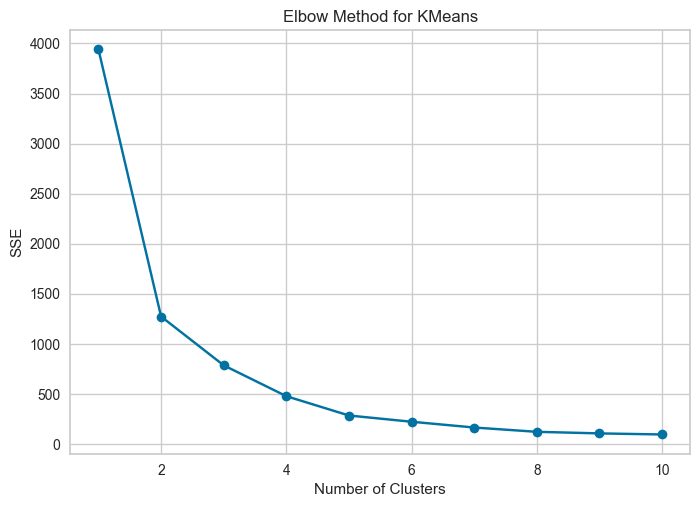

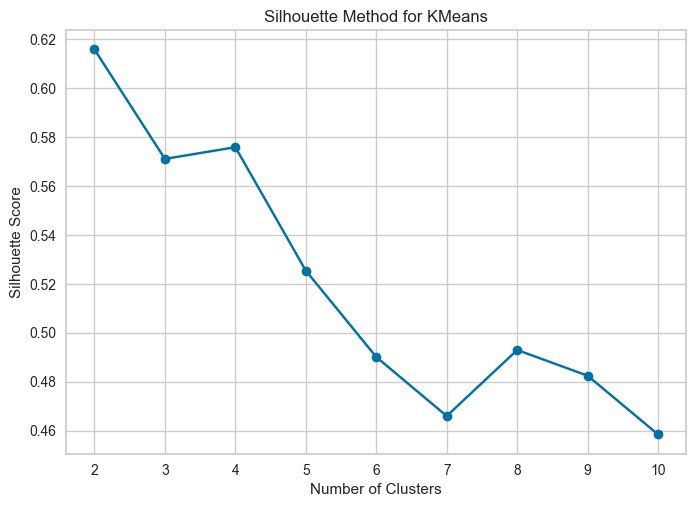

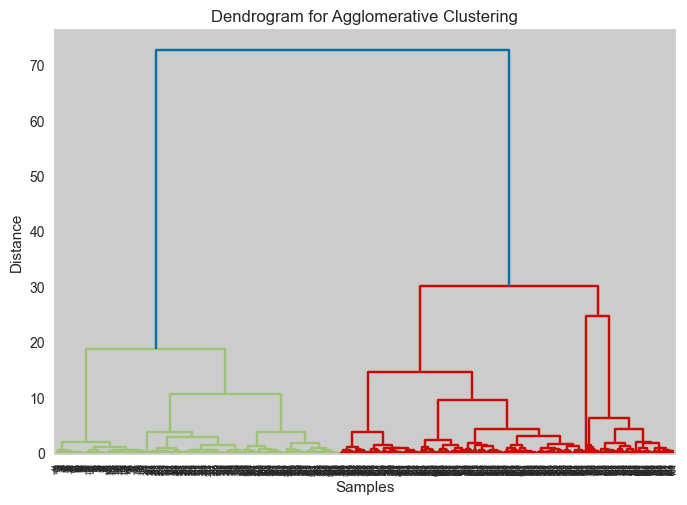

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your data
data = df.copy()
data = drop_columns(data)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Method for KMeans
def kmeans_elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.figure()
    plt.plot(range(1, max_clusters+1), sse, marker='o')
    plt.title('Elbow Method for KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

# Silhouette Method for KMeans
def kmeans_silhouette_method(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    plt.figure()
    plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
    plt.title('Silhouette Method for KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Dendrogram for Agglomerative Clustering
def plot_dendrogram(data):
    Z = linkage(data, 'ward')
    plt.figure()
    dendrogram(Z)
    plt.title('Dendrogram for Agglomerative Clustering')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# Determine optimal eps for DBSCAN
def optimal_eps(data, min_samples=5):
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:,1], axis=0)
    plt.figure()
    plt.plot(distances)
    plt.title('Elbow Method for Optimal eps (DBSCAN)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.show()

# Determine optimal number of clusters for KMeans and Agglomerative Clustering
kmeans_elbow_method(data_scaled)
kmeans_silhouette_method(data_scaled)
plot_dendrogram(data_scaled)
#optimal_eps(data_scaled)


In [5]:
# Based on the plots, choose the best number of clusters or eps value for each algorithm
best_n_clusters_kmeans = 2  # Replace with your determined number based on results before
best_n_clusters_agg = 2     # Replace with your determined number based on results before
best_eps_dbscan = 0.5       # Replace with your determined eps based on results before

# Apply the clustering algorithms with the chosen parameters
kmeans = KMeans(n_clusters=best_n_clusters_kmeans)
agg_clustering = AgglomerativeClustering(n_clusters=best_n_clusters_agg)
dbscan = DBSCAN(eps=best_eps_dbscan, min_samples=5)

# Fit the models and store the labels
labels_kmeans = kmeans.fit_predict(data_scaled)
labels_agg = agg_clustering.fit_predict(data_scaled)
labels_dbscan = dbscan.fit_predict(data_scaled)

#Print the labels
print("KMeans Labels:", labels_kmeans)
print("Agglomerative Clustering Labels:", labels_agg)
#print("DBSCAN Labels:", labels_dbscan)

KMeans Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0

Algorithm: KMeans
  Silhouette Score: 0.6157953664359661
  Davies-Bouldin Score: 0.5305221697319648

Algorithm: AgglomerativeClustering
  Silhouette Score: 0.6125747038671404
  Davies-Bouldin Score: 0.5234282981819806

Algorithm: DBSCAN
  Silhouette Score: 0.622752311299549
  Davies-Bouldin Score: 1.780994334819967

Algorithm: MeanShift
  Silhouette Score: 0.4529875609954955
  Davies-Bouldin Score: 0.4122698668791814

Algorithm: SpectralClustering
  Silhouette Score: 0.8618062771111717
  Davies-Bouldin Score: 0.10346336596834917



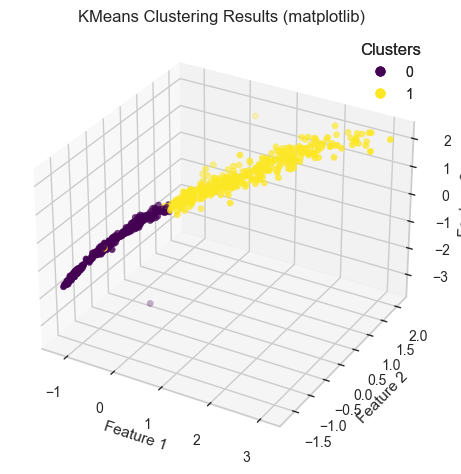

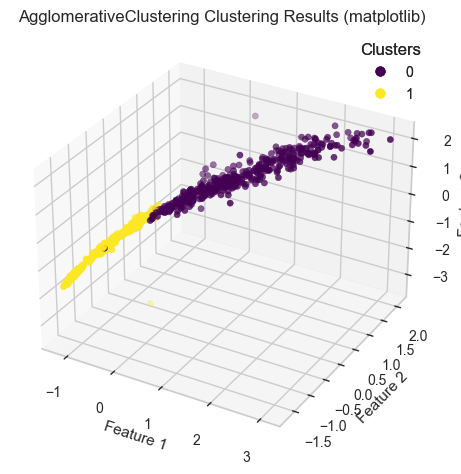

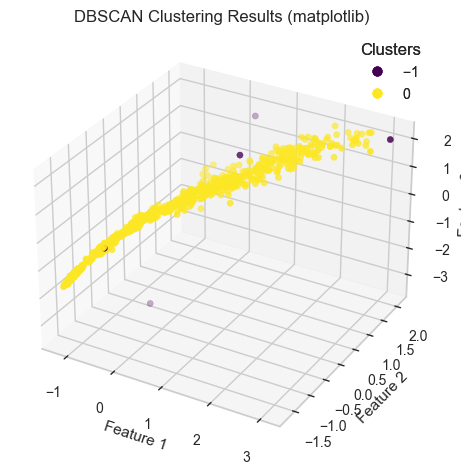

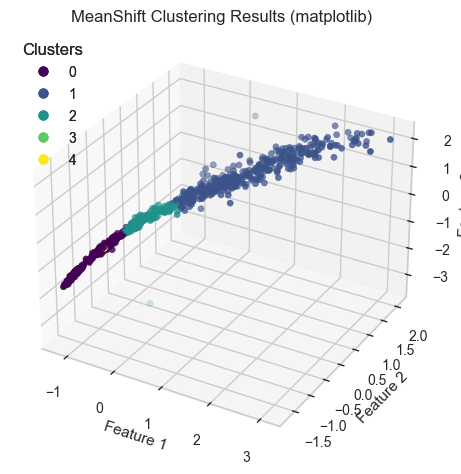

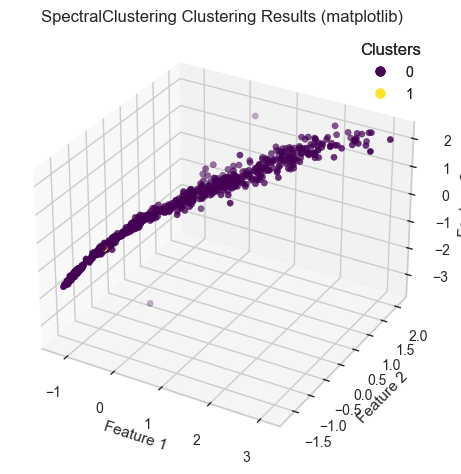

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Load your data e drop the columns non-numeric
data = df.copy()
data = drop_columns(data)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Define the clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=2)
}

# Dictionary to store the results
results = {}

# Evaluate each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    # Fit the model
    labels = algorithm.fit_predict(data_scaled)
    
    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(data_scaled, labels)
    davies_bouldin = davies_bouldin_score(data_scaled, labels)
    
    # Store the results
    results[name] = {'Labels': labels, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin}

# Print the results
for name, metrics in results.items():
    print(f"Algorithm: {name}")
    for metric, value in metrics.items():
        if metric != 'Labels':
            print(f"  {metric}: {value}")
    print()

# 3D Visualization using matplotlib
def plot_3d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    plt.show()

# 3D Visualization using plotly
def plotly_3d(data, labels, title):
    fig = px.scatter_3d(
        x=data[:, 0], y=data[:, 1], z=data[:, 2],
        color=labels,
        title=title,
        labels={'x': 'Feature 1', 'y': 'Feature 2', 'z': 'Feature 3'},
        color_continuous_scale='Viridis'
    )
    fig.show()

# Plotting results for each algorithm
for name, metrics in results.items():
    labels = metrics['Labels']
    plot_3d(data_scaled, labels, f'{name} Clustering Results (matplotlib)')
    plotly_3d(data_scaled, labels, f'{name} Clustering Results (plotly)')


In [7]:
# Divinding using VMT
# Dividing by section ( 100 grams)#
# Evaluate features of each cluster(100 grams)